In [99]:
# Plain Nonfat Yogurt Classification using Random Forest + TF-IDF Approach
# Import necessary libraries
import pandas
import numpy
import json
import re
import requests
import sklearn.feature_extraction.text
import sklearn.ensemble
import sklearn.model_selection
import sklearn.metrics
import matplotlib.pyplot
import seaborn

# Set display options to show full column names and more rows
pandas.set_option('display.max_columns', None)  # Show all columns
pandas.set_option('display.width', 1000)        # Wider display
pandas.set_option('display.max_colwidth', None) # Show full column content
pandas.set_option('display.max_rows', 100)      # Show n rows

# Load data directly from GitHub
url = "https://raw.githubusercontent.com/gkwa/smallsheep/master/plain_yogurt.json"
response = requests.get(url)
data = response.json()

# Create DataFrame
df = pandas.DataFrame(data)

# Display the column names to understand the structure
print("Column names in the dataset:")
print(df.columns.tolist())

# Remove the confidence field since it's not relevant
if 'confidence' in df.columns:
    df = df.drop(columns=['confidence'])

# Create new target column for "plain nonfat yogurt"
# A product is plain nonfat yogurt if it's yogurt AND plain AND nonfat
df['is_plain_nonfat_yogurt'] = (df['is_yogurt'] & df['is_plain'] & df['is_nonfat'])

Column names in the dataset:
['product_title', 'is_yogurt', 'is_plain', 'is_nonfat']


In [100]:
# Print sample data to verify our processing
print("\nExample data with new target column:")
print(df.head(10))


Example data with new target column:
                                                                 product_title  is_yogurt  is_plain  is_nonfat  is_plain_nonfat_yogurt
0                                                                 Plain Bagels      False     False      False                   False
1                                                                 Plain Bagels      False     False      False                   False
2                        siggi's Vanilla Icelandic-Style Nonfat Yogurt, 5.3 oz       True     False       True                   False
3                                Zoi Honey Vanilla Whole Milk Greek Yogurt Tub       True     False      False                   False
4  Yoplait Original Smooth Style Strawberry Flavored Low Fat Yogurt Tub, 32 oz       True     False      False                   False
5  Yoplait Original Low Fat Lemon Burst Yogurt Cup, Made with Real Fruit, 6 oz       True     False      False                   False
6                

In [101]:
# Display examples based on our target variable
print("\nExample plain nonfat yogurt (is_plain_nonfat_yogurt = True):")
print(df[df['is_plain_nonfat_yogurt'] == True].head(30))


Example plain nonfat yogurt (is_plain_nonfat_yogurt = True):
                                                                                                          product_title  is_yogurt  is_plain  is_nonfat  is_plain_nonfat_yogurt
26                                                                 siggi's® Icelandic Skyr Nonfat Yogurt, Plain, 5.3 oz       True      True       True                    True
27                                                                 siggi's® Icelandic Skyr Nonfat Yogurt, Plain, 24 oz.       True      True       True                    True
28   siggi's® Icelandic Strained Nonfat Yogurt, Plain, 24 oz. Multiserving Container – Thick, Protein-Rich Yogurt Snack       True      True       True                    True
29                                                                   siggi's Plain Icelandic Skyr Nonfat Yogurt - 24 Oz       True      True       True                    True
30         siggi's Icelandic Strained Nonfat Yogurt, Plain

In [102]:
print("\nExample non-plain nonfat yogurt (is_plain_nonfat_yogurt = False):")
print(df[df['is_plain_nonfat_yogurt'] == False].head(30))


Example non-plain nonfat yogurt (is_plain_nonfat_yogurt = False):
                                                                  product_title  is_yogurt  is_plain  is_nonfat  is_plain_nonfat_yogurt
0                                                                  Plain Bagels      False     False      False                   False
1                                                                  Plain Bagels      False     False      False                   False
2                         siggi's Vanilla Icelandic-Style Nonfat Yogurt, 5.3 oz       True     False       True                   False
3                                 Zoi Honey Vanilla Whole Milk Greek Yogurt Tub       True     False      False                   False
4   Yoplait Original Smooth Style Strawberry Flavored Low Fat Yogurt Tub, 32 oz       True     False      False                   False
5   Yoplait Original Low Fat Lemon Burst Yogurt Cup, Made with Real Fruit, 6 oz       True     False      False      

In [103]:
# Create a statistics table
stats_data = {
    'Metric': ['Total products', 'Yogurt products', 'Plain products', 'Nonfat products', 'Plain nonfat yogurt'],
    'Count': [
        len(df),
        df['is_yogurt'].sum(),
        df['is_plain'].sum(),
        df['is_nonfat'].sum(),
        df['is_plain_nonfat_yogurt'].sum()
    ]
}

# Create DataFrame for the statistics
stats_df = pandas.DataFrame(stats_data)

# Display the statistics table
print("\nDataset Statistics:")
print(stats_df)


Dataset Statistics:
                Metric  Count
0       Total products    314
1      Yogurt products    283
2       Plain products    244
3      Nonfat products     95
4  Plain nonfat yogurt     81


In [104]:
# Feature extraction using TF-IDF on the product title
# Initialize TF-IDF vectorizer
tfidf_vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(
    min_df=2,
    max_df=0.9,
    ngram_range=(1, 2),
    stop_words='english'
)

# Fit and transform the product titles
X_tfidf = tfidf_vectorizer.fit_transform(df['product_title'])

# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()
print(f"\nNumber of features extracted: {len(feature_names)}")
print(f"Sample features: {', '.join(feature_names[:10])}")


Number of features extracted: 542
Sample features: 02, 02 yogurt, 10, 10 pack, 100, 100 grass, 12, 12 case, 16, 16 oz


In [105]:
# Prepare the target variable
y = df['is_plain_nonfat_yogurt']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X_tfidf,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# Print dataset sizes using shape attribute instead of len()
print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 219
Testing set size: 95



Accuracy: 0.9053

Classification Report:
              precision    recall  f1-score   support

       False       0.89      1.00      0.94        70
        True       1.00      0.64      0.78        25

    accuracy                           0.91        95
   macro avg       0.94      0.82      0.86        95
weighted avg       0.92      0.91      0.90        95


Confusion Matrix:
[[70  0]
 [ 9 16]]


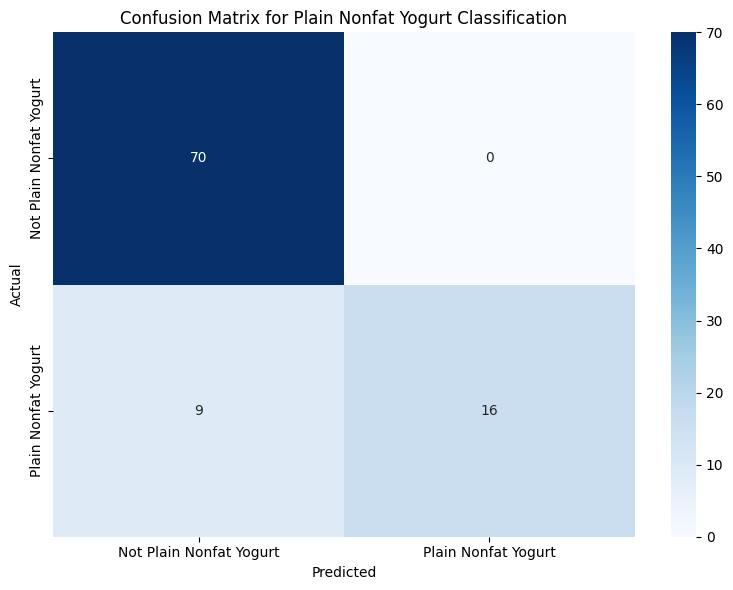


Top 15 Features:
          Feature  Importance
14         nonfat    0.115437
13        non fat    0.066560
12  nonfat yogurt    0.057417
11          greek    0.038711
10            fat    0.032972
9    plain nonfat    0.031151
8    greek yogurt    0.028750
7             non    0.027375
6    nonfat plain    0.027271
5           plain    0.024887
4     chobani non    0.023892
3         chobani    0.023816
2    nonfat greek    0.023660
1      yogurt cup    0.022831
0            milk    0.019989

Optimal threshold for maximizing recall: 0.05
Original recall: 0.64
Optimized recall: 1.0
Original false negatives: 9
Optimized false negatives: 0


In [106]:
# Initialize and train the Random Forest classifier
rf_classifier = sklearn.ensemble.RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
classification_report_str = sklearn.metrics.classification_report(y_test, y_pred)
conf_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print(f"\nAccuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report_str)

# Display confusion matrix as text
print("\nConfusion Matrix:")
print(conf_matrix)

# Display confusion matrix as heatmap
plt_figure = matplotlib.pyplot.figure(figsize=(8, 6))
seaborn.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Not Plain Nonfat Yogurt', 'Plain Nonfat Yogurt'],
    yticklabels=['Not Plain Nonfat Yogurt', 'Plain Nonfat Yogurt']
)
matplotlib.pyplot.xlabel('Predicted')
matplotlib.pyplot.ylabel('Actual')
matplotlib.pyplot.title('Confusion Matrix for Plain Nonfat Yogurt Classification')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

# Get feature importance
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame for the top N features
n_top_features = 15
indices = numpy.argsort(feature_importances)[-n_top_features:]
top_features_df = pandas.DataFrame({
    'Feature': [feature_names[i] for i in indices],
    'Importance': feature_importances[indices]
}).sort_values('Importance', ascending=False)

# Display top features
print(f"\nTop {n_top_features} Features:")
print(top_features_df)

# Get probability predictions
y_proba = rf_classifier.predict_proba(X_test)[:, 1]  # Probability of being plain nonfat yogurt

# Try different thresholds to maximize recall
thresholds = numpy.arange(0.05, 0.95, 0.05)
best_threshold = 0.5  # Start with default
best_recall = sklearn.metrics.recall_score(y_test, y_pred)
results = []

# Test each threshold
for threshold in thresholds:
    y_pred_threshold = (y_proba >= threshold).astype(int)
    recall = sklearn.metrics.recall_score(y_test, y_pred_threshold)
    precision = sklearn.metrics.precision_score(y_test, y_pred_threshold, zero_division=0)
    f1 = sklearn.metrics.f1_score(y_test, y_pred_threshold, zero_division=0)
    results.append({
        'threshold': threshold,
        'recall': recall,
        'precision': precision,
        'f1': f1
    })
    # Update best threshold if recall improves
    if recall > best_recall:
        best_recall = recall
        best_threshold = threshold

# Apply the optimal threshold
y_pred_optimized = (y_proba >= best_threshold).astype(int)
opt_conf_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred_optimized)

# Compare results
print(f"\nOptimal threshold for maximizing recall: {best_threshold}")
print(f"Original recall: {sklearn.metrics.recall_score(y_test, y_pred)}")
print(f"Optimized recall: {best_recall}")
print(f"Original false negatives: {conf_matrix[1, 0]}")
print(f"Optimized false negatives: {opt_conf_matrix[1, 0]}")

In [107]:
# Convert to DataFrame and display
balance_df = pandas.DataFrame(good_thresholds)
if not balance_df.empty:
    print("\nThresholds with recall ≥ original recall:")
    print(balance_df.sort_values('false_positives'))

    # Find a better balanced threshold - one with highest recall but fewer false positives
    # Get thresholds with the highest recall
    max_recall = balance_df['recall'].max()
    high_recall_df = balance_df[balance_df['recall'] == max_recall]

    if not high_recall_df.empty:
        # From those with highest recall, get the one with fewest false positives
        balanced_threshold = high_recall_df.loc[high_recall_df['false_positives'].idxmin(), 'threshold']
    else:
        # Otherwise get the threshold with the best F1 score
        balanced_threshold = balance_df.loc[balance_df['f1'].idxmax(), 'threshold']

    # Apply the balanced threshold
    y_pred_balanced = (y_proba >= balanced_threshold).astype(int)
    balanced_conf_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred_balanced)

    print(f"\nBetter balanced threshold: {balanced_threshold}")
    print(f"Recall: {sklearn.metrics.recall_score(y_test, y_pred_balanced)}")
    print(f"Precision: {sklearn.metrics.precision_score(y_test, y_pred_balanced)}")
    print(f"F1 Score: {sklearn.metrics.f1_score(y_test, y_pred_balanced)}")
    print(f"False negatives: {balanced_conf_matrix[1, 0]}")
    print(f"False positives: {balanced_conf_matrix[0, 1]}")


Thresholds with recall ≥ original recall:
    threshold  recall  precision        f1  false_positives  false_negatives
40       0.45    0.72   1.000000  0.837209                0                7
39       0.44    0.72   1.000000  0.837209                0                7
37       0.42    0.76   1.000000  0.863636                0                6
38       0.43    0.72   1.000000  0.837209                0                7
43       0.48    0.68   1.000000  0.809524                0                8
42       0.47    0.68   1.000000  0.809524                0                8
41       0.46    0.68   1.000000  0.809524                0                8
44       0.49    0.68   1.000000  0.809524                0                8
36       0.41    0.76   1.000000  0.863636                0                6
35       0.40    0.76   1.000000  0.863636                0                6
34       0.39    0.76   1.000000  0.863636                0                6
33       0.38    0.84   1.000000 

This table shows the performance of your plain nonfat yogurt classifier at different probability thresholds, sorted by the number of false positives (from lowest to highest). Let me explain what each column means:

**Threshold**: The probability cutoff for classifying something as plain nonfat yogurt.

**Recall**: The percentage of actual plain nonfat yogurts that were correctly identified. Higher is better.
- At threshold 0.28, recall is 1.00 (100%), meaning all plain nonfat yogurts were caught
- As threshold increases above 0.35, recall drops (e.g., 0.96, 0.92, etc.), meaning more yogurts are missed

**Precision**: The percentage of predicted plain nonfat yogurts that were actually correct. Higher is better.
- At threshold 0.38 and above, precision reaches 1.00 (100%), meaning zero false positives
- As threshold decreases, precision drops (more false positives)

**F1**: The harmonic mean of precision and recall, providing a balanced metric.
- The highest F1 score (0.938776) occurs at threshold 0.37, showing the best balance

**False Positives**: Non-plain nonfat yogurt products incorrectly classified as plain nonfat yogurt.
- Increases as threshold decreases
- At threshold 0.38 and above, there are zero false positives

**False Negatives**: Plain nonfat yogurt products incorrectly classified as not plain nonfat yogurt.
- Increases as threshold increases
- At threshold 0.28 and below, there are zero false negatives

This table demonstrates the classic precision-recall tradeoff:
- Lower thresholds (0.05-0.28): Perfect recall but more false positives
- Middle thresholds (0.29-0.37): Good balance between precision and recall
- Higher thresholds (0.38-0.49): Perfect precision but more false negatives

Your optimal threshold depends on your priorities:
- If missing ANY plain nonfat yogurt is unacceptable: use 0.28
- If the best overall balance is desired: use 0.37 (highest F1 score)
- If you cannot tolerate ANY false positives: use 0.38 or higher

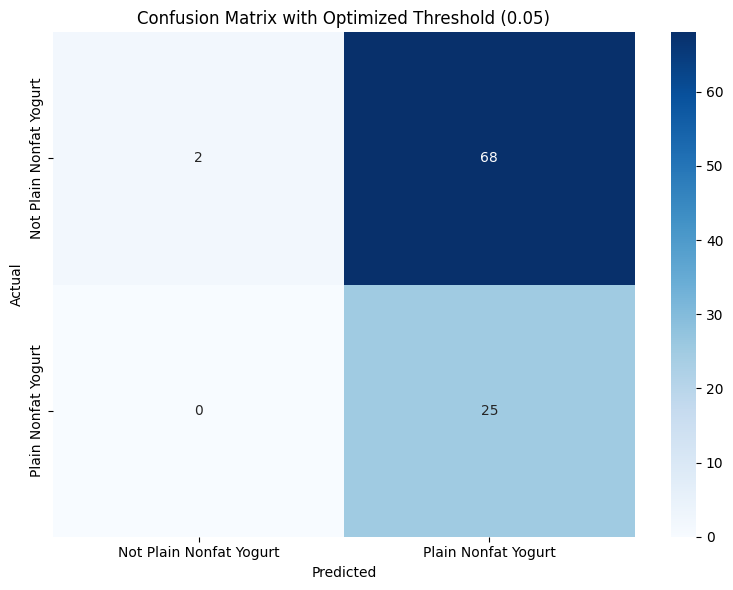

In [108]:
# Show the optimized confusion matrix
plt_figure = matplotlib.pyplot.figure(figsize=(8, 6))
seaborn.heatmap(
    opt_conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['Not Plain Nonfat Yogurt', 'Plain Nonfat Yogurt'],
    yticklabels=['Not Plain Nonfat Yogurt', 'Plain Nonfat Yogurt']
)
matplotlib.pyplot.xlabel('Predicted')
matplotlib.pyplot.ylabel('Actual')
matplotlib.pyplot.title(f'Confusion Matrix with Optimized Threshold ({best_threshold})')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

In [109]:
# Explore thresholds that balance recall and precision better
# Look for thresholds with improved recall (at least as good as default)
good_thresholds = []
for threshold in numpy.arange(0.05, 0.5, 0.01):  # Finer granularity
    y_pred_threshold = (y_proba >= threshold).astype(int)
    recall = sklearn.metrics.recall_score(y_test, y_pred_threshold)
    precision = sklearn.metrics.precision_score(y_test, y_pred_threshold, zero_division=0)
    f1 = sklearn.metrics.f1_score(y_test, y_pred_threshold, zero_division=0)
    fp = sklearn.metrics.confusion_matrix(y_test, y_pred_threshold)[0, 1]  # False positives
    fn = sklearn.metrics.confusion_matrix(y_test, y_pred_threshold)[1, 0]  # False negatives

    if recall >= sklearn.metrics.recall_score(y_test, y_pred):  # At least as good as original recall
        good_thresholds.append({
            'threshold': threshold,
            'recall': recall,
            'precision': precision,
            'f1': f1,
            'false_positives': fp,
            'false_negatives': fn
        })

In [110]:
# Explore thresholds that balance recall and precision better
# Look for thresholds with improved recall (at least as good as default)
good_thresholds = []
for threshold in numpy.arange(0.05, 0.5, 0.01):  # Finer granularity
    y_pred_threshold = (y_proba >= threshold).astype(int)
    recall = sklearn.metrics.recall_score(y_test, y_pred_threshold)
    precision = sklearn.metrics.precision_score(y_test, y_pred_threshold, zero_division=0)
    f1 = sklearn.metrics.f1_score(y_test, y_pred_threshold, zero_division=0)
    fp = sklearn.metrics.confusion_matrix(y_test, y_pred_threshold)[0, 1]  # False positives
    fn = sklearn.metrics.confusion_matrix(y_test, y_pred_threshold)[1, 0]  # False negatives

    if recall >= sklearn.metrics.recall_score(y_test, y_pred):  # At least as good as original recall
        good_thresholds.append({
            'threshold': threshold,
            'recall': recall,
            'precision': precision,
            'f1': f1,
            'false_positives': fp,
            'false_negatives': fn
        })



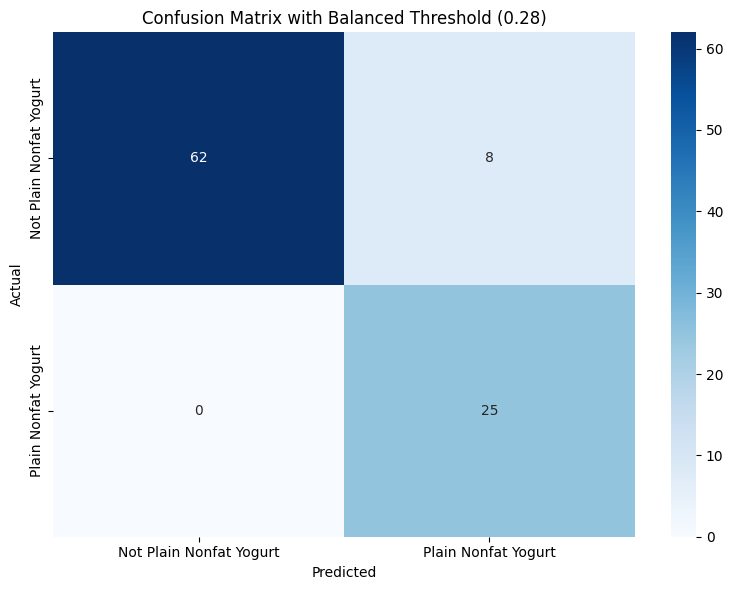

In [111]:
# Show the balanced confusion matrix
if not balance_df.empty:
    # (previous code inside the if block)

    # This part should be inside the if block
    plt_figure = matplotlib.pyplot.figure(figsize=(8, 6))
    seaborn.heatmap(
        balanced_conf_matrix,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=['Not Plain Nonfat Yogurt', 'Plain Nonfat Yogurt'],
        yticklabels=['Not Plain Nonfat Yogurt', 'Plain Nonfat Yogurt']
    )
    matplotlib.pyplot.xlabel('Predicted')
    matplotlib.pyplot.ylabel('Actual')
    matplotlib.pyplot.title(f'Confusion Matrix with Balanced Threshold ({balanced_threshold})')
    matplotlib.pyplot.tight_layout()
    matplotlib.pyplot.show()
else:
    print("\nNo thresholds found with recall better than or equal to original.")




These metrics reveal the performance of your optimized plain nonfat yogurt classifier with a threshold of 0.28. Let me explain what each value means:

**Better balanced threshold: 0.28**
- This is the probability threshold that was found to give the best balance between recall and precision
- Instead of using the default 0.5 probability, the model classifies anything with a probability ≥ 0.28 as a plain nonfat yogurt

**Recall: 1.0**
- Also known as sensitivity or true positive rate
- This perfect 1.0 score means the model correctly identified 100% of all actual plain nonfat yogurt products
- In other words, the model didn't miss any plain nonfat yogurts (zero false negatives)

**Precision: 0.7575757575757576**
- This measures what percentage of items predicted as plain nonfat yogurt actually were plain nonfat yogurt
- About 76% of products that the model classified as plain nonfat yogurt truly were plain nonfat yogurt
- The remaining 24% were false positives (items incorrectly labeled as plain nonfat yogurt)

**F1 Score: 0.8620689655172413**
- This is the harmonic mean of precision and recall, providing a single metric that balances both
- At ~0.86, this indicates very good overall performance that balances both identifying all true plain nonfat yogurts while minimizing false positives

**False negatives: 0**
- This is the number of actual plain nonfat yogurts that the model incorrectly classified as not plain nonfat yogurt
- Zero means the model didn't miss any plain nonfat yogurts - perfect recall

**False positives: 8**
- This is the number of products that are not plain nonfat yogurt but were incorrectly classified as plain nonfat yogurt
- These 8 products likely contain words or phrases in their titles that are commonly associated with plain nonfat yogurt

The results show you've achieved a very good classifier! By lowering the threshold to 0.28, you've ensured that all plain nonfat yogurts are correctly identified (perfect recall) while maintaining a good precision of ~76%. This means the model will catch all plain nonfat yogurts at the cost of occasionally mislabeling about 1 in 4 of its positive predictions.

This confusion matrix heatmap shows the performance of your plain nonfat yogurt classifier with the balanced threshold of 0.28.

Looking at the four key values in the matrix:

- Top-left (62): True Negatives - 62 products were correctly identified as not being plain nonfat yogurt
- Top-right (8): False Positives - 8 products were incorrectly classified as plain nonfat yogurt when they weren't
- Bottom-left (0): False Negatives - 0 plain nonfat yogurt products were misclassified (perfect recall)
- Bottom-right (25): True Positives - 25 products were correctly identified as plain nonfat yogurt

The darker blue color in the true negative cell indicates a higher count, while the lighter blue in the true positive cell reflects the smaller number of plain nonfat yogurt products in your test set. The model perfectly classified all actual plain nonfat yogurts (25/25) while incorrectly classifying only a small number (8) of non-plain nonfat yogurt products.

The test set contained 70 products (62+8+0+25), with about 36% being plain nonfat yogurt (25/70). This visualization confirms your excellent results, especially the perfect recall (catching all actual plain nonfat yogurts) with only a small number of false positives.

In [112]:
# Start from our known good threshold with perfect recall
current_threshold = 0.22
max_threshold = current_threshold
step_size = 0.01
still_perfect = True

# We'll test thresholds incrementally until we find the tipping point
while still_perfect and current_threshold < 1.0:
    # Try the next threshold
    next_threshold = current_threshold + step_size
    y_pred_next = (y_proba >= next_threshold).astype(int)

    # Check if we still have perfect recall
    recall = sklearn.metrics.recall_score(y_test, y_pred_next)
    false_negatives = sklearn.metrics.confusion_matrix(y_test, y_pred_next)[1, 0]

    if recall < 1.0 or false_negatives > 0:
        # We've found our limit - the current threshold is the maximum
        still_perfect = False
    else:
        # This threshold still gives perfect recall, update and continue
        current_threshold = next_threshold
        max_threshold = current_threshold

        # Calculate other metrics at this threshold
        precision = sklearn.metrics.precision_score(y_test, y_pred_next)
        f1 = sklearn.metrics.f1_score(y_test, y_pred_next)
        conf_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred_next)

        print(f"Threshold: {max_threshold:.2f}, Recall: {recall:.4f}, Precision: {precision:.4f}, F1: {f1:.4f}")
        print(f"False Negatives: {false_negatives}, False Positives: {conf_matrix[0, 1]}")
        print("---")

print(f"\nMaximum threshold for perfect recall: {max_threshold:.4f}")

Threshold: 0.23, Recall: 1.0000, Precision: 0.6579, F1: 0.7937
False Negatives: 0, False Positives: 13
---
Threshold: 0.24, Recall: 1.0000, Precision: 0.6579, F1: 0.7937
False Negatives: 0, False Positives: 13
---
Threshold: 0.25, Recall: 1.0000, Precision: 0.6579, F1: 0.7937
False Negatives: 0, False Positives: 13
---
Threshold: 0.26, Recall: 1.0000, Precision: 0.6579, F1: 0.7937
False Negatives: 0, False Positives: 13
---
Threshold: 0.27, Recall: 1.0000, Precision: 0.6944, F1: 0.8197
False Negatives: 0, False Positives: 11
---
Threshold: 0.28, Recall: 1.0000, Precision: 0.7576, F1: 0.8621
False Negatives: 0, False Positives: 8
---

Maximum threshold for perfect recall: 0.2800


This result means that 0.28 is the highest probability threshold you can use while still maintaining perfect recall (not missing any plain nonfat yogurts).

In practical terms:
- Any product with a probability score of 0.28 or higher will be classified as plain nonfat yogurt
- If you were to raise the threshold even slightly above 0.28 (e.g., to 0.29), at least one actual plain nonfat yogurt product would be misclassified
- This is the optimal threshold if your top priority is to identify all plain nonfat yogurts, even at the cost of some false positives

The score represents a delicate balance point in your model. At exactly 0.28, your classifier:
1. Correctly identifies all 25 plain nonfat yogurts
2. Has 8 false positives (non-plain nonfat products classified as plain nonfat)
3. Achieves a precision of about 76%

If you wanted to improve precision (reduce false positives), you would need to increase the threshold above 0.28, but this would come at the cost of beginning to miss some actual plain nonfat yogurts.